<a href="https://colab.research.google.com/github/AldataSci/AmazonSentimentAnalysis/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1
Import libaries and glance at the dataset and its contents..

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

review_df = pd.read_csv('https://raw.githubusercontent.com/AldataSci/AmazonSentimentAnalysis/main/amazon_reviews.csv')
review_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [2]:
## There are 3150 entries with 5 columns that contain rating,date,reviews and feedback columns
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [3]:
review_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [4]:
## Check for null values.. we don't have any null values.
review_df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [5]:
## Taking a in-depth look at the review column..
review_df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

## Task 2 Peform Data Exploration

We will now explore the data

<Axes: xlabel='rating', ylabel='count'>

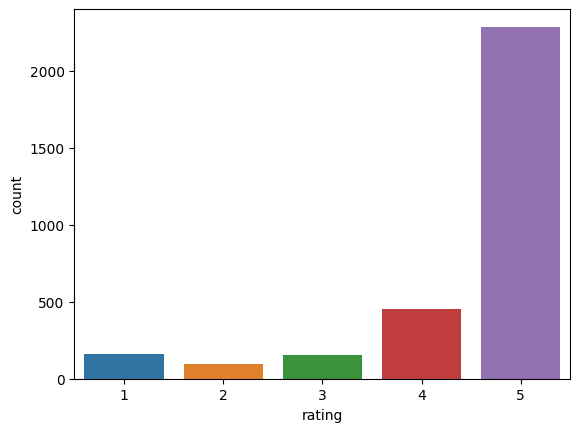

In [6]:
## Let's take a look at the distribution of the rating of Amazon's Alexa
sns.countplot(x = review_df['rating'],label = 'count')

<Axes: xlabel='feedback', ylabel='count'>

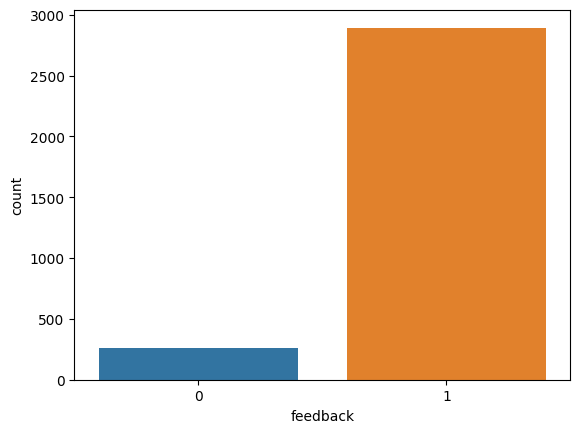

In [7]:
## We can visualize the data with countplot we can see that there are more positive reviews than negative reviews..
sns.countplot(x = review_df['feedback'],label = 'count')

In [8]:
## Let us get the length of the character for each reviews..
review_df['length'] = review_df['verified_reviews'].apply(lambda x: len(x))
review_df

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [9]:
## Let us look at the stats now
review_df.describe()

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.049524
std,1.068506,0.273778,182.099952
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


In [10]:
## Let us view the shortest reviews.. We may need to delete this empty entries since its just cluttering up the feedback a
review_df[review_df['length'] == 1]

,rating,date,variation,verified_reviews,feedback,length
60,5,30-Jul-18,Heather Gray Fabric,😍,1,1
85,5,30-Jul-18,Heather Gray Fabric,,1,1
183,3,29-Jul-18,Heather Gray Fabric,,1,1
219,5,29-Jul-18,Sandstone Fabric,,1,1
374,1,26-Jul-18,Black,,0,1
...,...,...,...,...,...,...
3114,3,30-Jul-18,Black Dot,,1,1
3120,5,30-Jul-18,Black Dot,,1,1
3123,4,30-Jul-18,Black Dot,,1,1
3126,5,30-Jul-18,Black Dot,,1,1


In [11]:
## Let us view the longest review..  a very positive review..
review_df[review_df['length'] == 2851]

,rating,date,variation,verified_reviews,feedback,length
2016,5,20-Jul-18,Black Plus,Incredible piece of technology.I have this rig...,1,2851


<Axes: title={'center': 'Length Distribution'}, ylabel='Frequency'>

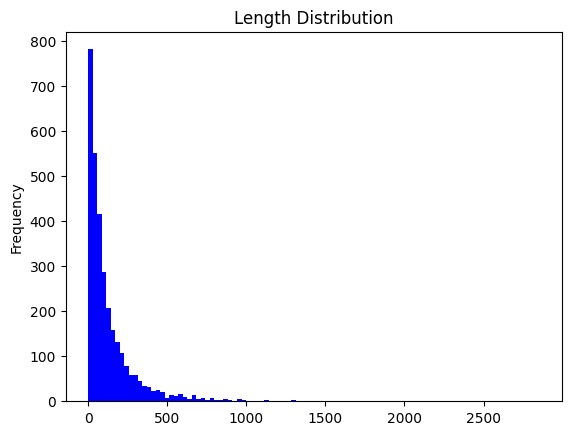

In [12]:
## Let us look at the distribution of the length of the reviews.. its skewed to the left
review_df['length'].plot(kind = 'hist',bins = 100, color = 'b', title = 'Length Distribution')

## Plot the WordCloud
We will plot the Wordcloud for both the negative and positive sentiments..

In [13]:
## This is the wordcloud for positive reviews..
positive = review_df[review_df['feedback'] == 1]
positive

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [14]:
## We have to convert the verified_reviews into one big array..
psentences = review_df['verified_reviews'].tolist()
psentences = " ".join(psentences)


In [15]:
## We will check the length of it. 419105 this is essentially one big string..
len(psentences)

419105

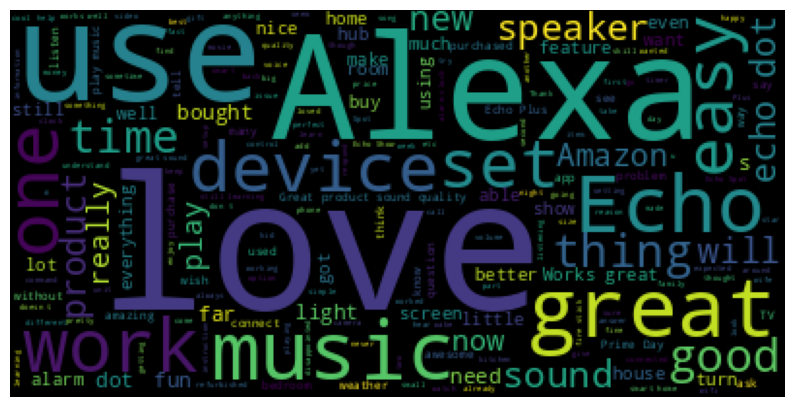

In [16]:
## We can see positive reviews like love,use,easy,feature,and good..
from wordcloud import WordCloud
plt.figure(figsize = (10,10))
plt.imshow(WordCloud().generate(psentences))
plt.axis("off")
plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')

In [17]:
## This is the wordcloud for negative feedback
nsentences = review_df[review_df['feedback'] == 0]
nsentences

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


In [18]:
## The negative sentiment
nsentences = nsentences['verified_reviews'].tolist()
nsentences = " ".join(nsentences)


In [19]:
## There are about 55573 length..
len(nsentences)

55573

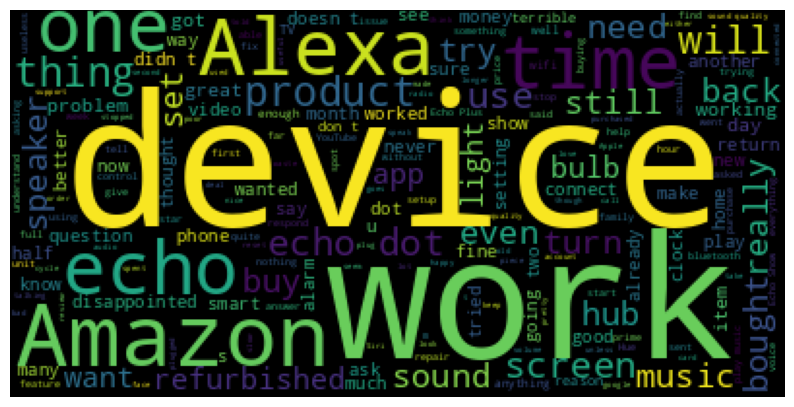

In [20]:
## Seems most of the negativity is work,refunds,Alexa device.
from wordcloud import WordCloud
plt.figure(figsize = (10,10))
plt.imshow(WordCloud().generate(nsentences))
plt.axis("off")
plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')

## Perform Data Cleaning
We will clean the text of stopwords and punctuations if there are any.

In [21]:
## We will create a function that will remove the stopwords and the punctuations..
## First we will remove all kinds of punctuations, then we join the words together and then remove all the stopwords..
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


def message_cleaning(message):
  Test_punc_remove = [char for char in message if char not in string.punctuation
                      ]
  Test_punc_remove_join = ''.join(Test_punc_remove)
  Test_punc_remove_Join_clean = [word for word in Test_punc_remove_join.split() if word.lower() not in stopwords.words('english')]
  return Test_punc_remove_Join_clean

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
## Now we apply the function on the given dataframe.
review_df_clean = review_df['verified_reviews'].apply(lambda x: message_cleaning(x))
review_df_clean

0                                            [Love, Echo]
1                                                 [Loved]
2       [Sometimes, playing, game, answer, question, c...
3       [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                                 [Music]
                              ...                        
3145                    [Perfect, kids, adults, everyone]
3146    [Listening, music, searching, locations, check...
3147    [love, things, running, entire, home, TV, ligh...
3148    [complaint, sound, quality, isnt, great, mostl...
3149                                               [Good]
Name: verified_reviews, Length: 3150, dtype: object

In [23]:
## Taking a glimpse of the clean version
print(review_df_clean[5])

['received', 'echo', 'gift', 'needed', 'another', 'Bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'Can’t', 'wait', 'see', 'else']


In [24]:
# Taking a look at the original version..
print(review_df['verified_reviews'][5])

I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.


In [25]:
## We are now going to tokenize the words..
from sklearn.feature_extraction.text import CountVectorizer
## define the cleaning pipeline
vectorizer = CountVectorizer(analyzer = message_cleaning)
review_vectorizer = vectorizer.fit_transform(review_df['verified_reviews'])


In [26]:
## convert the review_vectorizer to an array..
print(review_vectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [27]:
review_vectorizer.shape

(3150, 5211)

In [28]:
## Now we convert it to a dataframe object
X = pd.DataFrame(review_vectorizer.toarray())
X

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
## Let y be the sentiment value of the review_df
y = review_df['feedback']
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

In [30]:
## Take a look at the shape of both X and y we have defined..
X.shape

(3150, 5211)

In [31]:
y.shape

(3150,)

## Train A Model:
We will now train and evaluate a Naive Bayes classification model..

In [32]:
## We will split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [33]:
## We will import the Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

NB_classifer = MultinomialNB()
NB_classifer.fit(X_train,y_train)


MultinomialNB()

<Axes: >

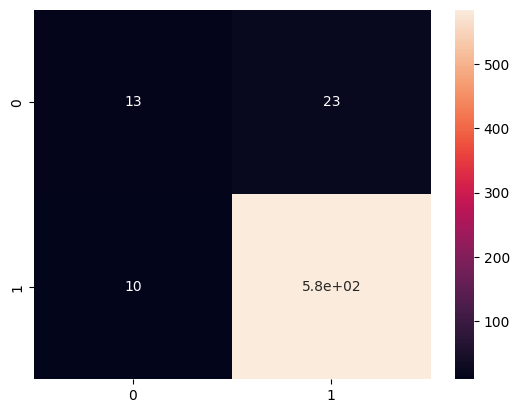

In [34]:
## Look at the evaluation metrics..
from sklearn.metrics import classification_report,confusion_matrix

y_predict_test = NB_classifer.predict(X_test)
cm = confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot = True)

In [35]:
## It looks good there were a lot of positive reviews than negative ones which makes sense the recall would be so high.. ,
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.57      0.36      0.44        36
           1       0.96      0.98      0.97       594

    accuracy                           0.95       630
   macro avg       0.76      0.67      0.71       630
weighted avg       0.94      0.95      0.94       630



## Train and evaluate Logistic Regression Model
We will now use logistic regression to predict sentiment score..

In [36]:
## We will now import the logistic regression model

from sklearn.linear_model import LogisticRegression

## Instantiate the logregression model with the random_state_seed
logreg = LogisticRegression(random_state=16)

## We fit the model now with the training dataset..
logreg.fit(X_train,y_train)

## We will predict the y_test
y_pre = logreg.predict(X_test)


<Axes: >

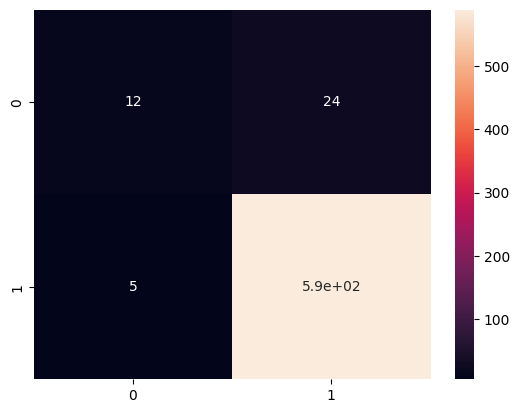

In [37]:
## We will predict the y_test and look at the confusion matrix..
y_pre = logreg.predict(X_test)

cm = confusion_matrix(y_test,y_pre)
sns.heatmap(cm,annot = True)

In [38]:
## Look at the classification report now looking at the weighted average logistic regression performed better

print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.71      0.33      0.45        36
           1       0.96      0.99      0.98       594

    accuracy                           0.95       630
   macro avg       0.83      0.66      0.71       630
weighted avg       0.95      0.95      0.95       630



## Xgboost Model
We will now use xgboost algorithm to train the model..

In [39]:
X_train.shape

(2520, 5211)

In [40]:
y_train.shape

(2520,)

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_prediction = model.predict(X_test)


<Axes: >

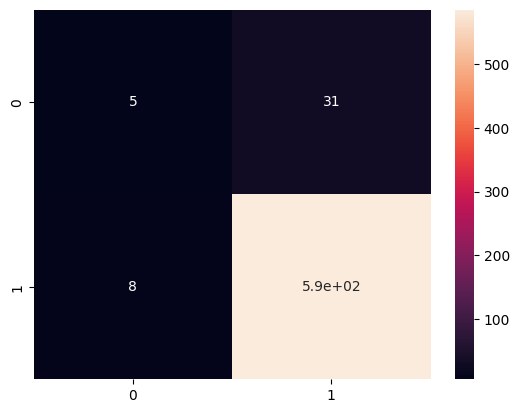

In [42]:
## We will predict the y_test and look at the confusion matrix..
y_prediction = model.predict(X_test)

cm1 = confusion_matrix(y_test,y_prediction)
sns.heatmap(cm1,annot = True)

In [43]:
## It performed less better than logistic regression...
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.38      0.14      0.20        36
           1       0.95      0.99      0.97       594

    accuracy                           0.94       630
   macro avg       0.67      0.56      0.59       630
weighted avg       0.92      0.94      0.92       630

